In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load file
data = pd.read_csv("201007_marketing_customer_analysis.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# Get the numeric data.
data_numerical = data.select_dtypes('number')
data_numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
# Check normality.
from scipy.stats import skew
data_numerical.apply(skew)


Customer Lifetime Value          3.031782
Income                           0.286840
Monthly Premium Auto             2.123198
Months Since Last Claim          0.278541
Months Since Policy Inception    0.040158
Number of Open Complaints        2.782806
Number of Policies               1.253127
Total Claim Amount               1.714684
dtype: float64

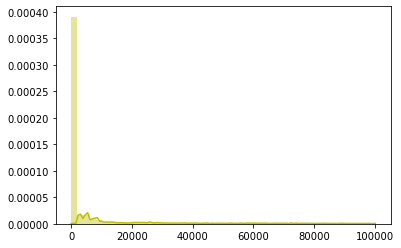

In [7]:
sns.distplot(data_numerical, color="y")

Q-Q plot for variable:  Customer Lifetime Value


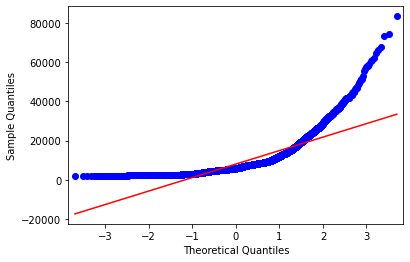

Q-Q plot for variable:  Income


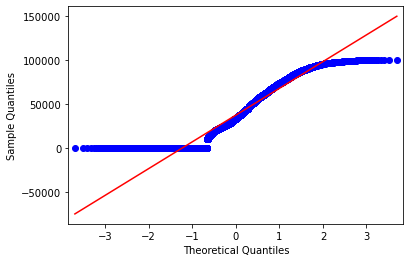

Q-Q plot for variable:  Monthly Premium Auto


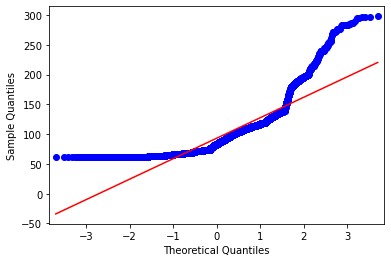

Q-Q plot for variable:  Months Since Last Claim


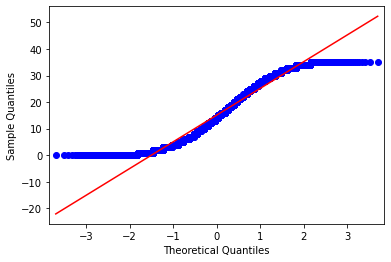

Q-Q plot for variable:  Months Since Policy Inception


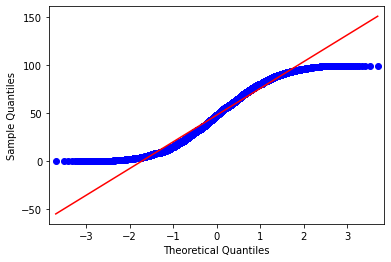

Q-Q plot for variable:  Number of Open Complaints


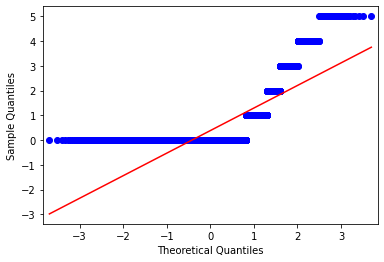

Q-Q plot for variable:  Number of Policies


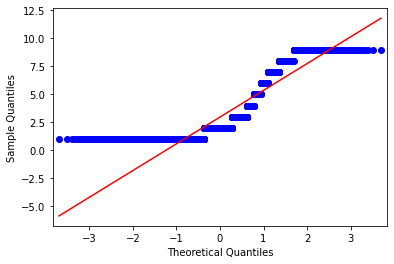

Q-Q plot for variable:  Total Claim Amount


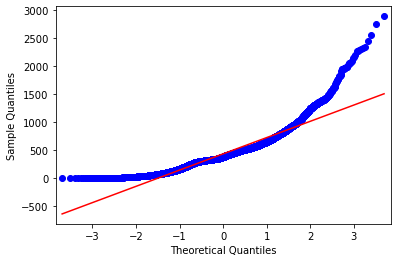

In [8]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
cols = list(data_numerical.columns)
for col in cols:
    print("Q-Q plot for variable: ",col)
    qqplot(data[col], line='s')
    pyplot.show()

In [14]:
# Check normality. Shapiro-Wilk Test
from scipy import stats
shapiro_test = stats.shapiro([data_numerical['Income'], data_numerical['Customer Lifetime Value'], data_numerical['Monthly Premium Auto']])
shapiro_test.pvalue

0.0

In [18]:
# Check multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = data_numerical.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Customer Lifetime Value,2.805772
1,Income,2.278732
2,Monthly Premium Auto,6.363674
3,Months Since Last Claim,2.782622
4,Months Since Policy Inception,3.265764
5,Number of Open Complaints,1.166609
6,Number of Policies,2.297052


In [19]:
#monthly premium Auto has VIF>5, indicating high multicollinearity between this independent variable and the others.
#Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:
X = data_numerical.drop(['Monthly Premium Auto'],axis=1)
calc_vif(X)

,variables,VIF
0,Customer Lifetime Value,2.464493
1,Income,2.238585
2,Months Since Last Claim,2.687899
3,Months Since Policy Inception,3.092350
4,Number of Open Complaints,1.163372
5,Number of Policies,2.265310
6,Total Claim Amount,3.002417
